<a href="https://colab.research.google.com/github/k-Mahendran/CNN-Projects/blob/main/Numerical_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [33]:
mnistt = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnistt.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [34]:
x_train.shape

(60000, 28, 28)

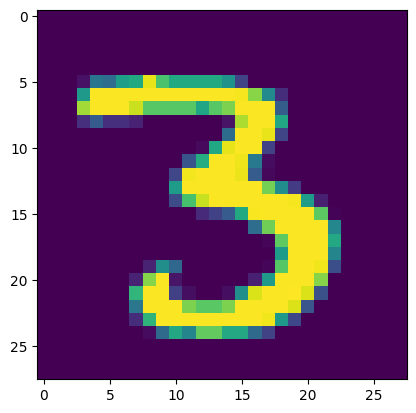

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12])

In [36]:
y_train[12]

np.uint8(3)

In [37]:
# Layer operations
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Neural Nerwork Operations
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.0905 - loss: 8.2472 - val_accuracy: 0.0892 - val_loss: 8.2616
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.0903 - loss: 8.2378 - val_accuracy: 0.0892 - val_loss: 8.2616
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.0933 - loss: 8.2022 - val_accuracy: 0.0892 - val_loss: 8.2616
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.0890 - loss: 8.2529 - val_accuracy: 0.0892 - val_loss: 8.2616
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.0916 - loss: 8.2538 - val_accuracy: 0.0892 - val_loss: 8.2616


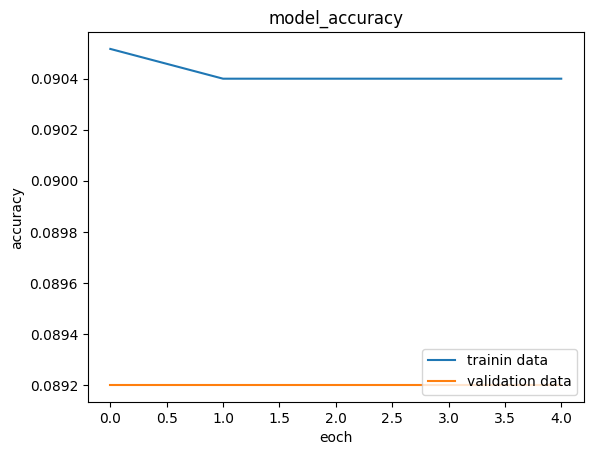

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('eoch')
plt.legend(['trainin data', 'validation data'], loc = 'lower right')

In [29]:
# prediction
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
y_predict1 = np.argmax(y_predict, axis = 1)
accuracy_score(y_predict1,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


0.0892

Text(0.5, 1.0, 'y_test: 6, y_predict: [5 5 5 ... 5 5 5]')

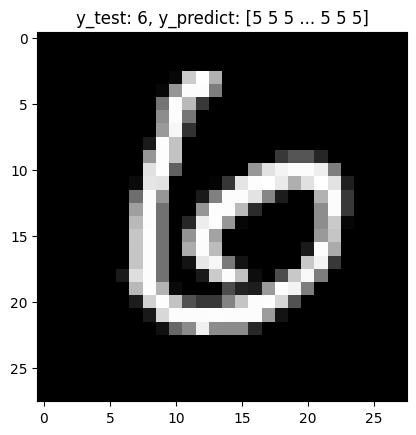

In [30]:
plt.imshow(x_test[11], cmap ='gray')
plt.title(f'y_test: {y_test[11]}, y_predict: {y_predict1}')

In [31]:
import tensorflow as tf
tf.keras.models.save_model(model, 'model1.hdf5')